# Model/Parameter Selection

### Adapted from Professor Graham's Problem Set

This code sample is adapted from a problem set provided by Professor Graham for the course ECON 143: Econometrics: Advanced Methods and Techniques Spring 2024. It is used here for demonstration purposes with appropriate modifications.

In [19]:
# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.linear_model import LinearRegression

from scipy.interpolate import griddata

I will analyze calorie consumption data from a sample of rural households in Nicargua. I am interested in the relationship between total household expendtiure and calorie consumption. 

The dataset includes several years of data. I will work with X0 and Y0, which correspond to household expenditure in Cordobas, Nicaragua per adult equivalent and calorie consumption per adult equivalent respectively in the base year of of the survey (2000). 

In [3]:
data = '/Users/ayansarkar/Desktop/SPUR/'

In [7]:
#Get data only for variables of interest
calories = pd.read_csv(data + 'RPS_calorie_data.out', header = 0)
calories['constant'] = 1
calories[['constant', 'X0', 'Y0']].head()

,constant,X0,Y0
0,1,8.819086,7.963177
1,1,6.889811,6.484601
2,1,6.650684,6.876681
3,1,6.909742,6.754492
4,1,8.034308,7.162158


In [8]:
#Get Summary Stats
pnad96 = pd.read_csv(data + 'Brazil_1996PNAD.out', header = 0, sep='\t+', engine='python')

# Find relevant estimation subsample
sample = pnad96.loc[(pnad96['MONTHLY_EARNINGS'] > 0) & (pnad96['AgeInDays'] >= 20)  & (pnad96['AgeInDays'] < 65)]

#Display the first few rows of the dataframe
sample.describe()

,AgeInDays,YRSSCH,MONTHLY_EARNINGS,Father_NoSchool,Father_Incomplete1stPrimary,Father_Complete1stPrimary,Father_Incomplete2ndPrimary,Father_Complete2ndPrimary,Father_IncompleteSecondary,Father_CompleteSecondary,...,Mother_NoSchool,Mother_Incomplete1stPrimary,Mother_Complete1stPrimary,Mother_Incomplete2ndPrimary,Mother_Complete2ndPrimary,Mother_IncompleteSecondary,Mother_CompleteSecondary,Mother_IncompleteHigher,Mother_CompleteHigher,Mother_DontKnow
count,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,...,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000,57651.000000
mean,37.971992,5.747324,632.051985,0.287575,0.205027,0.138419,0.033425,0.053685,0.052159,0.038802,...,0.341052,0.188288,0.134985,0.040849,0.064370,0.031951,0.044249,0.016392,0.052991,0.084873
std,11.126182,4.231994,1105.739430,0.452636,0.403725,0.345342,0.179746,0.225397,0.222349,0.193126,...,0.474067,0.390945,0.341710,0.197943,0.245413,0.175871,0.205650,0.126978,0.224018,0.278695
min,20.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.943190,3.000000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.750170,5.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.895960,8.000000,600.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.996570,15.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Coefficients: 
 [1.87831534 0.68778462]


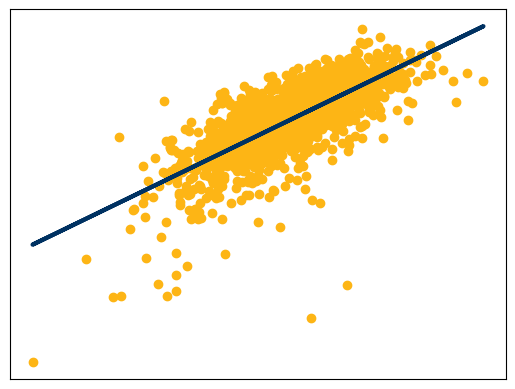

In [21]:
#Fit a linear Model of Calories on Household Expenditure and plot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Selecting independent variables (features)
W = calories[['constant', 'X0']]

# Selecting dependent variable (target)
Y = calories['Y0']

# Create linear regression object
regr = LinearRegression(fit_intercept=False)

# Fit the calorie demand model
regr.fit(W, Y)

# Compute fitted values
calories_pred = regr.predict(W)

# Print out the estimated regression coefficients
print("Coefficients: \n", regr.coef_)

# Plot fitted regression model
plt.scatter(calories['X0'], calories['Y0'], color="#FDB515")
plt.plot(calories['X0'], calories_pred, color="#003262", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


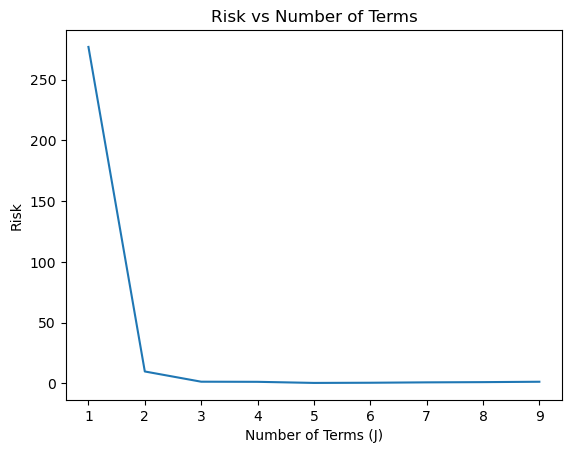

In [48]:
#Plot Risk and bias/complexity tradeoff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Assuming 'X0' is a column in your DataFrame
X = calories['X0']
Y = calories['Y0']

# Write a function that computes the series regression of Y onto 1, X, X2, ..., XJ-1 by least squares
def series(Y, X, J):
    N = len(Y)
    W = {}
    for j in range(J):
        W['W' + str(j)] = X ** j  # Create a dictionary with keys W0, W1, W2, ..., WJ-1
    W = pd.DataFrame(W)  # Convert the dictionary to a DataFrame
    
    regr = linear_model.LinearRegression(fit_intercept=False)
    regr.fit(W, Y)
    m_hat = regr.predict(W)
    SSR = np.sum((Y - m_hat) ** 2)
    s2 = (1 / (N - J)) * SSR
    return [SSR, s2]

# Write a Mallows function
def mallowsCj(Y, X, L):
    N = len(Y)
    risk_table = np.zeros((L-1, 2))  # changed to L-1 instead of L like the original pic
    [_, s2_L] = series(Y, X, L)  # big model for J in range (1,L):
    for J in range(1, L):
        [SSR_J, _] = series(Y, X, J)
        Cj = -N * s2_L + SSR_J + 2 * s2_L * J
        risk_table[J-1, :] = [J, Cj]
    return risk_table

# Plot risk based on new risk table using Mallows
J = 5
L = 10
risk_table = mallowsCj(Y, X, L)
plt.plot(risk_table[:, 0], risk_table[:, 1])
plt.xlabel('Number of Terms (J)')
plt.ylabel('Risk')
plt.title('Risk vs Number of Terms')
plt.show()


In [46]:
#Fit more complex model with J based off risk tradeoff shown above.
calories['X0^2'] = calories['X0'] ** 2
calories['X0^3'] = calories['X0'] ** 3
calories['X0^4'] = calories['X0'] ** 4
  

# Now W includes the constant and powers of X0 up to the 5th
W = calories[['constant', 'X0', 'X0^2', 'X0^3', 'X0^4']]
Y = calories['Y0']  # Fixed typo in Y column name

# Create linear regression object with no intercept since 'constant' column is used
regr = linear_model.LinearRegression(fit_intercept=False)

# Fit the calorie demand model
regr.fit(W, Y)

# Compute fitted values
calories_pred = regr.predict(W)

# Print out the estimated regression coefficients
print("Regression Coefficients: \n", regr.coef_)

Regression Coefficients: 
 [-1.09521011e+02  5.47446355e+01 -9.88006271e+00  8.06716717e-01
 -2.48371008e-02]


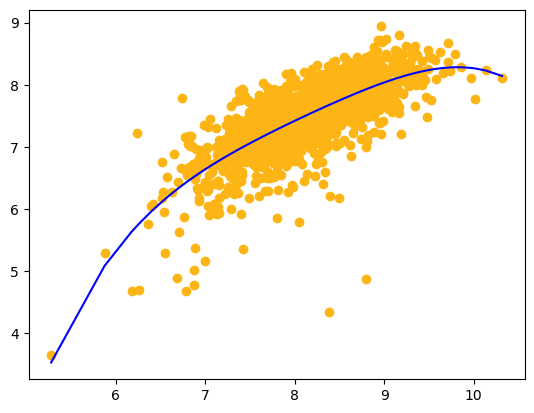

In [47]:
#Generate Optimal fit from above
plt.scatter(calories['X0'], calories['Y0'], color="#FDB515")

# For plotting the fitted model, we need to sort the values since the line needs to be continuous
sorted_order = np.argsort(calories['X0'])
plt.plot(calories['X0'][sorted_order], calories_pred[sorted_order], color="blue")

plt.show()